In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

ModuleNotFoundError: No module named 'otter'

https://github.com/Aoverbye/eds220-hwk2# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/Aoverbye/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [37]:
# FINAL CODE
# Import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [16]:
# a.

catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# b. 
catch_data.info
catch_data.columns
catch_data.head()
print(catch_data.isnull().sum())

Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I used the `.columns` to be able to see the column names as that will be import for calling in information in the future.
I did `.info` so I could get a general lay of the land of the data file. 
I did `.head()` so I could read exactly how the data is imputted info the fataframe.
I did `catch_data.isnull().sum` so I could see how many Nans I may be dealing with. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
catch_data = catch_data.drop(columns=['notesRegCode'])

In [6]:
# I am using a new cell to check the column names so I know that notesRegCode has been removed
# I am doing this in a new cell because it is not possible to drop a column twice
# Check column names
catch_data.columns

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Region and Species are objects, which is what I would expect because they are categorical data. I would expect Catch to be an int64 because it is the number of fish that were caught and I would expect the researchers to count whole fish without decimals. The Year column is also an int64, which is not surprising because the data goes back to the 1800s, and would probably not be specific enough to warrent a datetime data approach. _

In [8]:
# Use dtype to check data types by column
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [17]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [26]:
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']]
catch_I 

,Region,Year,Species,Catch


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [25]:
#catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)
#catch_1 = catch_data.loc[catch_data['Catch'] == 'I', 'Catch'] = 1
catch_1


# Update the 'I' values to 1 in the Catch column
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

# Convert the Catch column to int64

print(catch_column_type)

print(catch_data)

int64
     Region  Year notesRegCode  Species  Catch
0       SSE  1886          NaN  Chinook      0
1       SSE  1887          NaN  Chinook      0
2       SSE  1888          NaN  Chinook      0
3       SSE  1889          NaN  Chinook      0
4       SSE  1890          NaN  Chinook      0
...     ...   ...          ...      ...    ...
8535    NOP  1993          NaN     Chum    135
8536    NOP  1994          NaN     Chum     84
8537    NOP  1995          NaN     Chum     99
8538    NOP  1996          NaN     Chum     68
8539    NOP  1997          NaN     Chum     97

[8540 rows x 5 columns]


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [28]:

# Verify that the Catch column is now int64
catch_column_type = catch_data['Catch'].astype('int64')
catch_column_type

0         0
1         0
2         0
3         0
4         0
       ... 
8535    135
8536     84
8537     99
8538     68
8539     97
Name: Catch, Length: 8540, dtype: int64

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [72]:
# Create data frame with the average salmon catch per region, ensure the column keeps its name with .rename() function
# and put in descending order for step 9.
avg_region = (catch_data.groupby('Region')['Catch'].mean().rename('Catch').sort_values(ascending=False))


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Commercial Salmon Catch By Region From 1978 To 1997'}, xlabel='Site', ylabel='Average Commercial Catch'>

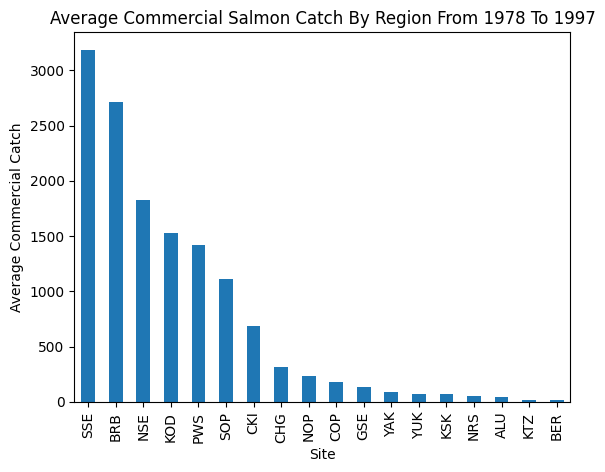

In [79]:
# Use .sort_values() to make the bars in the graph ordered by magnitude
avg_region.plot(kind='bar', title='Average Commercial Salmon Catch By Region From 1978 To 1997',
                xlabel=('Site'),
                ylabel=('Average Commercial Catch'))

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).